In [1]:
import os
import imageio
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import ndimage, misc
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
letterDict={
  "a": 0,"b": 1,"c": 2,"d": 3,"e": 4,"f": 5,"g": 6,"h": 7,"i": 8,
    "j": 9,"k": 10,"l": 11,"m": 12,"n": 13,"o": 14,"p": 15,"q": 16,"r": 17,
    "s": 18,"t": 19,"u": 20,"v": 21,"w": 22,"x": 23,"y": 24,"z": 25}

numberDict={
    0:"A", 1:"B", 2:"C", 3:"D", 4:"E", 5:"F", 6:"G", 7:"H", 8:"I",
    9:"J", 10:"K", 11:"L", 12:"M", 13:"N", 14:"O", 15:"P", 16:"Q", 17:"R",
    18:"S", 19:"T", 20:"U", 21:"V", 22:"W", 23:"X", 24:"Y", 25:"Z"}


def readPicture(df_complete, directory,letter_value):
    im = imageio.imread(directory)
    im.shape
    print("Letter value: ", directory, end="\r")

    im=np.reshape(im,400)
    df = pd.DataFrame(data=im).T
    y = np.repeat(0,400)
    df['Letter'] = letter_value
    
    return df_complete.append(df, ignore_index=True)

#Method ment for adding augmented pictures to a dataset
def addPictureToDataset(dataset, picture, letter_value):
    picture = np.reshape(picture,400)
    df = pd.DataFrame(data=picture).T
    df['Letter'] = letter_value
    return dataset.append(df, ignore_index=True)

In [3]:

def read_all_images(upper_directory):
    number_of_images = 0
    original_imgs = pd.DataFrame()
    aug20 = pd.DataFrame()
    aug90 = pd.DataFrame()
    aug270 = pd.DataFrame()
    aug320 = pd.DataFrame()
    for subdir, dirs, files in os.walk(upper_directory):
        for file in files:
            number_of_images+=1
            #print os.path.join(subdir, file)
            filepath = subdir + os.sep + file
            if filepath.endswith(".jpg"):
                # print(filepath)
                # Rotate every image that is being loaded:
            
                x = filepath.split("/")
                rotate20 = rotate_image(filepath,x[-1],20)
                rotate90 = rotate_image(filepath,x[-1],90)
                rotate270 = rotate_image(filepath,x[-1],270)
                rotate320 = rotate_image(filepath,x[-1],320)
                                
                # The label for the data:
                letter = (x[-1][0])
                letter_val = letterDict.get(letter)
                original_imgs = readPicture(original_imgs,filepath,letter_val)
                aug20 = addPictureToDataset(aug20, rotate20, letter_val)
                aug90 = addPictureToDataset(aug90, rotate90, letter_val)
                aug270 = addPictureToDataset(aug270, rotate270, letter_val)
                aug320 = addPictureToDataset(aug320, rotate320, letter_val)
    print("image")
    # vv.imshow("./dataset3/chars74k-lite/augmented/rotated_neg_a102.jpg")
    print("number_of_images", number_of_images)
    return original_imgs, aug20, aug90, aug270, aug320


#Rotates an image, stores it in a folder and returns the rotated image
def rotate_image(image_path,ending,deg):
    out_path = "./dataset3/augmented/"
    image_to_rotate = plt.imread(image_path)
    
    # Rotating the image:
    rotated_positive = ndimage.rotate(image_to_rotate, deg, reshape=False)
   
    fullpath = os.path.join(out_path, 'rotated_'+ str(deg) + '_' + ending)
    imageio.imwrite(fullpath, rotated_positive)
    return rotated_positive


In [4]:
# Unaugmented data, no feature selection:            
original_raw, aug20, aug90, aug270, aug320 = read_all_images("./dataset3/chars74k-lite")
original_raw

imager value:  ./dataset3/chars74k-lite/w/w_42.jpgg ./dataset3/chars74k-lite/n/n_140.jpg ./dataset3/chars74k-lite/a/a_248.jpg./dataset3/chars74k-lite/a/a_47.jpg ./dataset3/chars74k-lite/h/h_53.jpg ./dataset3/chars74k-lite/m/m_107.jpg ./dataset3/chars74k-lite/e/e_337.jpg
number_of_images 7113


,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Letter
0,21,23,8,7,24,21,17,30,21,31,...,86,78,87,68,43,16,16,17,22,17
1,238,255,249,237,247,253,244,243,249,234,...,255,236,218,236,241,255,210,252,237,17
2,231,223,229,236,226,218,223,227,228,227,...,229,230,225,222,219,219,221,223,223,17
3,11,13,8,9,32,0,31,3,13,21,...,12,5,17,1,22,4,5,6,6,17
4,161,166,166,167,165,168,164,159,166,159,...,207,255,239,195,86,47,30,11,3,17
5,253,241,243,222,224,201,206,202,190,198,...,216,210,208,216,225,237,240,244,247,17
6,201,212,199,207,199,198,191,197,189,183,...,227,220,230,235,84,28,28,28,70,17
7,53,34,50,37,58,41,48,49,35,57,...,38,39,47,46,31,35,36,38,39,17
8,255,255,255,248,241,255,252,239,255,253,...,73,83,76,72,85,83,73,76,84,17
9,214,237,237,222,250,212,248,211,228,206,...,225,202,237,222,208,216,224,232,243,17


In [7]:
#Scale features using StandardScaler. Assumes the features are from 0 to 399.

#The scaled values are not between -1 and 1. This is strange and may
#indicate that this scaler is not working out.
def standardScaling(data):
    features = np.arange(400)
    scaledData = data
    scaler = preprocessing.StandardScaler()
    scaledData[features] = scaler.fit_transform(scaledData[features])
    
    return scaledData


test = standardScaling(original_raw)
test

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Letter
0,-1.207500,-1.188366,-1.342840,-1.347827,-1.172811,-1.198303,-1.239314,-1.096007,-1.189674,-1.080494,...,-0.465166,-0.549594,-0.451719,-0.656471,-0.924762,-1.221951,-1.234994,-1.227721,-1.163936,17
1,1.060433,1.246808,1.184968,1.067594,1.176852,1.242851,1.154612,1.149866,1.220498,1.064124,...,1.344834,1.138525,0.955453,1.156973,1.197243,1.337623,0.840788,1.269154,1.082691,17
2,0.987274,0.910922,0.975191,1.057092,0.955583,0.874574,0.933147,0.981162,0.998508,0.990171,...,1.066373,1.074419,1.030645,1.005853,0.961464,0.952081,0.958487,0.961029,0.936399,17
3,-1.312014,-1.293331,-1.342840,-1.326823,-1.088518,-1.419270,-1.091671,-1.380696,-1.274241,-1.186140,...,-1.257711,-1.329547,-1.203643,-1.379689,-1.149823,-1.350465,-1.352693,-1.344596,-1.331127,17
4,0.255682,0.312625,0.314395,0.332466,0.312851,0.348463,0.310937,0.264169,0.343111,0.271777,...,0.830751,1.341527,1.181030,0.714406,-0.463922,-0.889956,-1.085195,-1.291471,-1.362475,17
5,1.217202,1.099858,1.122035,0.910066,0.934510,0.695696,0.753866,0.717562,0.596813,0.683798,...,0.927142,0.860733,0.848035,0.941087,1.025767,1.144852,1.161785,1.184154,1.187186,17
6,0.673734,0.795461,0.660526,0.752539,0.671095,0.664129,0.595677,0.664842,0.586242,0.525328,...,1.044953,0.967576,1.084354,1.146179,-0.485357,-1.093437,-1.106595,-1.110846,-0.662363,17
7,-0.873059,-1.072905,-0.902309,-1.032772,-0.814566,-0.987859,-0.912391,-0.895671,-1.041681,-0.805813,...,-0.979250,-0.966281,-0.881390,-0.893945,-1.053368,-1.018470,-1.020996,-1.004596,-0.986296,17
8,1.238105,1.246808,1.247901,1.183114,1.113632,1.263896,1.238979,1.107690,1.283923,1.264851,...,-0.604397,-0.496172,-0.569879,-0.613293,-0.474640,-0.504413,-0.625099,-0.600846,-0.516071,17
9,0.809601,1.057872,1.059102,0.910066,1.208462,0.811440,1.196795,0.812458,0.998508,0.768314,...,1.023532,0.775259,1.159546,1.005853,0.843575,0.919952,0.990587,1.056654,1.145388,17


In [8]:
#Scale features using MinMaxScaler. Assumes the features are from 0 to 399.
def minMaxScaling(data):
    features = np.arange(400)
    scaledData = data
    scaler = preprocessing.MinMaxScaler()
    scaledData[features] = scaler.fit_transform(scaledData[features])
    return scaledData

test = minMaxScaling(original_raw)
test

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Letter
0,0.082353,0.090196,0.031373,0.027451,0.094118,0.082353,0.066667,0.117647,0.082353,0.121569,...,0.337255,0.305882,0.341176,0.266667,0.168627,0.062745,0.062745,0.066667,0.086275,17
1,0.933333,1.000000,0.976471,0.929412,0.968627,0.992157,0.956863,0.952941,0.976471,0.917647,...,1.000000,0.925490,0.854902,0.925490,0.945098,1.000000,0.823529,0.988235,0.929412,17
2,0.905882,0.874510,0.898039,0.925490,0.886275,0.854902,0.874510,0.890196,0.894118,0.890196,...,0.898039,0.901961,0.882353,0.870588,0.858824,0.858824,0.866667,0.874510,0.874510,17
3,0.043137,0.050980,0.031373,0.035294,0.125490,0.000000,0.121569,0.011765,0.050980,0.082353,...,0.047059,0.019608,0.066667,0.003922,0.086275,0.015686,0.019608,0.023529,0.023529,17
4,0.631373,0.650980,0.650980,0.654902,0.647059,0.658824,0.643137,0.623529,0.650980,0.623529,...,0.811765,1.000000,0.937255,0.764706,0.337255,0.184314,0.117647,0.043137,0.011765,17
5,0.992157,0.945098,0.952941,0.870588,0.878431,0.788235,0.807843,0.792157,0.745098,0.776471,...,0.847059,0.823529,0.815686,0.847059,0.882353,0.929412,0.941176,0.956863,0.968627,17
6,0.788235,0.831373,0.780392,0.811765,0.780392,0.776471,0.749020,0.772549,0.741176,0.717647,...,0.890196,0.862745,0.901961,0.921569,0.329412,0.109804,0.109804,0.109804,0.274510,17
7,0.207843,0.133333,0.196078,0.145098,0.227451,0.160784,0.188235,0.192157,0.137255,0.223529,...,0.149020,0.152941,0.184314,0.180392,0.121569,0.137255,0.141176,0.149020,0.152941,17
8,1.000000,1.000000,1.000000,0.972549,0.945098,1.000000,0.988235,0.937255,1.000000,0.992157,...,0.286275,0.325490,0.298039,0.282353,0.333333,0.325490,0.286275,0.298039,0.329412,17
9,0.839216,0.929412,0.929412,0.870588,0.980392,0.831373,0.972549,0.827451,0.894118,0.807843,...,0.882353,0.792157,0.929412,0.870588,0.815686,0.847059,0.878431,0.909804,0.952941,17


In [5]:
#Methood merges dataset1 with dataset2
def mergeData(dataset1, dataset2):
    return dataset1.append(dataset2, ignore_index=True)

mergedData = mergeData(original_raw, aug20)
mergedData = mergeData(mergedData, aug90)
mergedData = mergeData(mergedData, aug270)
mergedData = mergeData(mergedData, aug320)
mergedData

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Letter
0,21,23,8,7,24,21,17,30,21,31,...,86,78,87,68,43,16,16,17,22,17
1,238,255,249,237,247,253,244,243,249,234,...,255,236,218,236,241,255,210,252,237,17
2,231,223,229,236,226,218,223,227,228,227,...,229,230,225,222,219,219,221,223,223,17
3,11,13,8,9,32,0,31,3,13,21,...,12,5,17,1,22,4,5,6,6,17
4,161,166,166,167,165,168,164,159,166,159,...,207,255,239,195,86,47,30,11,3,17
5,253,241,243,222,224,201,206,202,190,198,...,216,210,208,216,225,237,240,244,247,17
6,201,212,199,207,199,198,191,197,189,183,...,227,220,230,235,84,28,28,28,70,17
7,53,34,50,37,58,41,48,49,35,57,...,38,39,47,46,31,35,36,38,39,17
8,255,255,255,248,241,255,252,239,255,253,...,73,83,76,72,85,83,73,76,84,17
9,214,237,237,222,250,212,248,211,228,206,...,225,202,237,222,208,216,224,232,243,17


In [6]:
#Splitting dataset such that we get 80/20 for each letter
def get_train_test_set(data):
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    
    for i in range(26):
        train, test = train_test_split(data.loc[data['Letter']==i], test_size=0.2, shuffle=True)
        
        train_set = train_set.append([train], ignore_index=True)
        test_set = test_set.append([test], ignore_index=True)
    return train_set, test_set

train_set, test_set = get_train_test_set(mergedData)

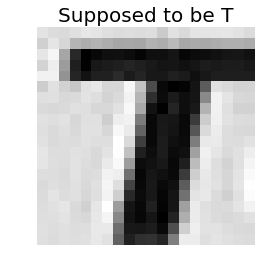

In [62]:
#Method prints a letter from a panda dataset.
def printLetter(letter):
    numpy_letter = letter[0:-1].values
    plt.imshow(numpy_letter.reshape(20,20), cmap = matplotlib.cm.binary)
    plt.axis("off")
    plt.title('Supposed to be {}'.format(numberDict.get(letter['Letter'])), fontsize=20)
    plt.show()
    return

a_letter = original_raw.iloc[2001]
printLetter(a_letter)


In [8]:
train_set
#test_set

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Letter
0,0,0,0,0,0,0,0,0,226,245,...,227,0,0,0,0,0,0,0,0,0
1,197,225,176,215,212,193,215,191,228,213,...,57,44,79,193,191,176,226,222,205,0
2,222,237,221,220,170,157,186,229,215,216,...,220,212,235,255,202,170,139,203,224,0
3,233,237,223,225,208,221,214,218,232,238,...,222,239,243,233,197,61,88,246,227,0
4,165,245,248,243,231,240,236,246,236,247,...,197,181,153,116,89,70,42,63,191,0
5,24,14,35,219,201,195,140,86,54,40,...,37,37,37,38,41,34,41,56,0,0
6,0,0,0,0,0,0,106,38,23,34,...,114,189,234,0,0,0,0,0,0,0
7,240,238,237,238,236,232,231,232,218,170,...,236,241,237,246,252,190,247,227,232,0
8,0,0,0,0,0,0,0,0,59,101,...,55,0,0,0,0,0,0,0,0,0
9,237,234,235,226,233,244,231,234,235,226,...,227,225,228,220,230,236,214,221,249,0


In [16]:
test_set.shape[0]/(train_set.shape[0]+test_set.shape[0])

0.2013498312710911